<a href="https://colab.research.google.com/github/sajid979/Freecodecamp-projects/blob/main/Predict_health_costs_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [17]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-09-11 12:24:03--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2024-09-11 12:24:03 (4.50 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [18]:
# Generate dummies for sex
dataset = pd.concat([dataset,pd.get_dummies(dataset['sex'],prefix="sex")],axis=1)
dataset.drop('sex', axis=1, inplace=True)

# Generate dummies for smoker
dataset = pd.concat([dataset,pd.get_dummies(dataset['smoker'],prefix="smoker")],axis=1)
dataset.drop('smoker', axis=1, inplace=True)

# Generate dummies for region
dataset = pd.concat([dataset,pd.get_dummies(dataset['region'],prefix="region")],axis=1)
dataset.drop('region', axis=1, inplace=True)
dataset

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,False,True,True,False,False,True,False,False
1334,18,31.9,0,2205.98,True,False,True,False,True,False,False,False
1335,18,36.9,0,1629.83,True,False,True,False,False,False,True,False
1336,21,25.8,0,2007.95,True,False,True,False,False,False,False,True


In [20]:
x_columns = dataset.columns.drop('expenses')
x = dataset[x_columns].values
y = dataset['expenses'].values

In [21]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)

In [29]:
# Example data conversion
train_dataset = np.array(train_dataset, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_dataset = np.array(test_dataset, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

# Check for NaNs and infinite values
assert not (np.isnan(train_dataset).any() or np.isinf(train_dataset).any())
assert not (np.isnan(train_labels).any() or np.isinf(train_labels).any())
assert not (np.isnan(test_dataset).any() or np.isinf(test_dataset).any())
assert not (np.isnan(test_labels).any() or np.isinf(test_labels).any())

# Model compilation and training
model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)

model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), callbacks=[monitor], verbose=2, epochs=1000)

Epoch 1/1000
34/34 - 1s - 41ms/step - loss: 2424.9985 - mean_absolute_error: 2424.9985 - mean_squared_error: 30593138.0000 - val_loss: 3121.2715 - val_mean_absolute_error: 3121.2715 - val_mean_squared_error: 43371956.0000
Epoch 2/1000
34/34 - 0s - 4ms/step - loss: 2423.2117 - mean_absolute_error: 2423.2117 - mean_squared_error: 30623454.0000 - val_loss: 3127.4241 - val_mean_absolute_error: 3127.4241 - val_mean_squared_error: 43376428.0000
Epoch 3/1000
34/34 - 0s - 4ms/step - loss: 2418.5137 - mean_absolute_error: 2418.5137 - mean_squared_error: 30374120.0000 - val_loss: 3124.0400 - val_mean_absolute_error: 3124.0400 - val_mean_squared_error: 43469496.0000
Epoch 4/1000
34/34 - 0s - 5ms/step - loss: 2415.1687 - mean_absolute_error: 2415.1687 - mean_squared_error: 30583238.0000 - val_loss: 3118.0562 - val_mean_absolute_error: 3118.0562 - val_mean_squared_error: 43414732.0000
Epoch 5/1000
34/34 - 0s - 3ms/step - loss: 2414.9597 - mean_absolute_error: 2414.9597 - mean_squared_error: 3056246

9/9 - 0s - 8ms/step - loss: 2714.7549 - mean_absolute_error: 2714.7549 - mean_squared_error: 38941600.0000
Testing set Mean Abs Error: 2714.75 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


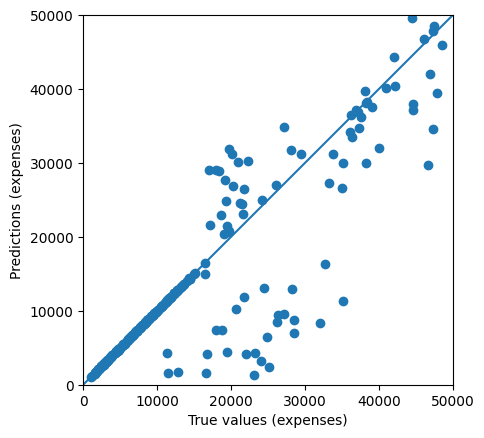

In [30]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)